<a href="https://colab.research.google.com/github/DivyaDariniSivabalan/ENCRYPTIX_DS_02/blob/main/MOVIE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import files
u = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [ ]:
df = pd.read_csv("IMDb Movies India.csv",encoding='latin1')

In [ ]:
df.head(5)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.isnull().sum()

,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df['Year'] = df['Year'].str.extract('(\d+)')  # Extract numeric part of the string
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

In [ ]:
df['Duration'] = df['Duration'].str.extract('(\d+)')
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

In [ ]:
df["Year"].head()

,Year
0,NaN
1,2019.0
2,2021.0
3,2019.0
4,2010.0


In [ ]:
genre=df['Genre']
genre.head(5)

,Genre
0,Drama
1,Drama
2,"Drama, Musical"
3,"Comedy, Romance"
4,Drama


In [ ]:
genres=df['Genre'].str.split(',',expand=True)
genres.head(5)

,0,1,2
0,Drama,None,None
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None


In [ ]:
genre_counts = {}
for genre in genres.values.flatten():
    if genre is not None:
        genre = str(genre).strip() # Convert genre to string and remove leading/trailing spaces
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_counts.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 3543
Adventure: 541
Animation: 125
Biography: 208
Comedy: 2029
Crime: 1322
Documentary: 383
Drama: 7243
Family: 943
Fantasy: 458
History: 207
Horror: 524
Music: 90
Musical: 589
Mystery: 513
News: 9
Reality-TV: 3
Romance: 2449
Sci-Fi: 58
Short: 1
Sport: 70
Thriller: 1713
War: 47
Western: 5
nan: 5631


In [ ]:
genresPie = df['Genre'].value_counts()

In [ ]:
genresPie.head(11)

,count
Genre,
Drama,2780
Action,1289
Thriller,779
Romance,708
"Drama, Romance",524
Comedy,495
"Action, Crime, Drama",455
"Drama, Family",418
Horror,322


In [ ]:
# Convert 'Votes' to numeric, handling errors
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''), errors='coerce')

# Convert 'Votes' to integers, replacing NaNs with a suitable value (e.g., 0)
df['Votes'] = df['Votes'].fillna(0).astype(int)

In [ ]:
df['Votes'].head(11)

,Votes
0,0
1,8
2,0
3,35
4,0
5,827
6,1086
7,0
8,326
9,11


In [ ]:
df["Director"].nunique()


5938

In [ ]:
directors =df["Director"].value_counts()

In [ ]:
directors.head(11)

,count
Director,
Jayant Desai,58
Kanti Shah,57
Babubhai Mistry,50
Mahesh Bhatt,48
Master Bhagwan,47
Nanabhai Bhatt,46
Dhirubhai Desai,46
B.R. Ishara,44
David Dhawan,44


In [ ]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors.head(11)

,count
Mithun Chakraborty,241
Dharmendra,231
Ashok Kumar,227
Jeetendra,179
Amitabh Bachchan,178
Rekha,142
Rajesh Khanna,139
Shashi Kapoor,133
Shakti Kapoor,131
Shatrughan Sinha,131


In [ ]:
genre_counts = df['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']
top_n_genres = genre_counts.head(5)

In [ ]:
top_n_genres

,Genre,Count
0,Drama,2780
1,Action,1289
2,Thriller,779
3,Romance,708
4,"Drama, Romance",524


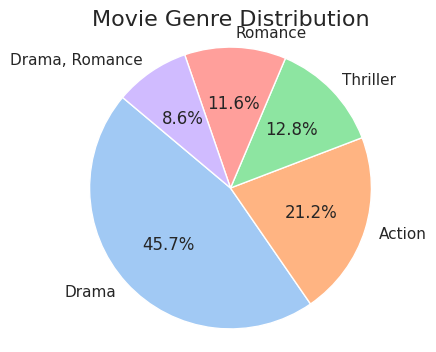

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

X = df.drop(['Rating'],axis=1)
y = df['Rating']

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over all columns in X and transform the data type to numeric if it is an object
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = le.fit_transform(X[col])

# Create a SimpleImputer object to replace NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on X
X = imputer.fit_transform(X)

# Impute missing values in the target variable 'y'
y = imputer.fit_transform(y.values.reshape(-1, 1))

# Flatten the y array after imputation
y = y.flatten()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
X_test = np.array(X_test)


y_pred = model.predict(X_test)
y_pred

array([5.93028068, 5.74755251, 6.15300422, ..., 6.00568296, 6.0234904 ,
       5.7725274 ])

In [ ]:
print('R2 score: ',r2_score(y_test,y_pred))
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))

R2 score:  0.038935394259525746
Mean squared error:  0.9368154016359949
Mean absolute error:  0.610971214570686
